# Analysis of Ford_GO_BIKE System

### Table of contents

-Introduction

-Gathering Data

-Assessing Data

-Cleaning Data

-Univariate Exploration

-Bivariate Exploration

-Multivariate Exploration


## Investigation Overview
In this investigation, I wanted to look at the customer behaviour characteristics of the bay Area bike share system. The main focus was on the time (month, weekday, hour), when bikes were high in demand.

## Dataset overview

The Dataset is Curated with Ford GoBike's trip data for public containing approximately 1,850,000 bike rides from FY2018. The features included the trip start/end time, as well as additional variables such as user type, gender, and age.

### Introduction



Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

### Preliminary Wrangling

### Data Gathering

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

import glob
import os

%matplotlib inline

###### Gathering involves following steps:



In [2]:
#1.Downloading tripdataset.csv files from "https://www.lyft.com/bikes/bay-wheels/system-data" and saving them in the path specified below.

path=r'C:\Users\deeps\Documents\UDACITY\FORDGOBIKE_Dataset'

files=glob.glob(os.path.join(path,"*.csv"))


In [4]:
#2.concatenate all the data from the downloaded files into a single dataframe
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)


In [33]:
#3.store dataframe into a csv file
df.to_csv(r'C:\Users\deeps\Documents\UDACITY\Data_visu\fordgo.csv', index = False)

In [34]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


### Assessing

In [3]:
#4.Read csv back to dataframe
ford_df = pd.read_csv('fordgo.csv')

In [4]:
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [7]:
ford_df.shape

(1949085, 16)

In [5]:
ford_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
# Let's take a peak into the data's basic information
ford_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949085 entries, 0 to 1949084
Data columns (total 16 columns):
duration_sec               1949085 non-null int64
start_time                 1949085 non-null object
end_time                   1949085 non-null object
start_station_id           1937066 non-null float64
start_station_name         1937066 non-null object
start_station_latitude     1949085 non-null float64
start_station_longitude    1949085 non-null float64
end_station_id             1937066 non-null float64
end_station_name           1937066 non-null object
end_station_latitude       1949085 non-null float64
end_station_longitude      1949085 non-null float64
bike_id                    1949085 non-null int64
user_type                  1949085 non-null object
member_birth_year          1836739 non-null float64
member_gender              1837057 non-null object
bike_share_for_all_trip    1949085 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 237.9+ MB


In [7]:
# Any duplicates?
sum(ford_df.duplicated())

0

In [8]:
# What about NaN values?
ford_df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12019
start_station_name          12019
start_station_latitude          0
start_station_longitude         0
end_station_id              12019
end_station_name            12019
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          112346
member_gender              112028
bike_share_for_all_trip         0
dtype: int64

In [9]:
ford_df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.949085e+06,1.937066e+06,1.949085e+06,1.949085e+06,1.937066e+06,1.949085e+06,1.949085e+06,1.949085e+06,1.836739e+06
mean,8.456523e+02,1.214133e+02,3.776742e+01,-1.223499e+02,1.199423e+02,3.776754e+01,-1.223494e+02,2.482837e+03,1.983276e+03
std,2.293484e+03,1.017502e+02,1.046207e-01,1.629799e-01,1.017857e+02,1.045042e-01,1.625904e-01,1.421408e+03,1.038252e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.480000e+02,3.500000e+01,3.777106e+01,-1.224116e+02,3.000000e+01,3.777106e+01,-1.224099e+02,1.313000e+03,1.978000e+03
50%,5.530000e+02,9.000000e+01,3.778107e+01,-1.223974e+02,8.900000e+01,3.778107e+01,-1.223971e+02,2.502000e+03,1.986000e+03
75%,8.670000e+02,1.900000e+02,3.779625e+01,-1.222876e+02,1.880000e+02,3.779728e+01,-1.222894e+02,3.552000e+03,1.991000e+03
max,8.628100e+04,3.850000e+02,4.551000e+01,-7.357000e+01,3.850000e+02,4.551000e+01,-7.357000e+01,6.638000e+03,2.001000e+03


### Quality issues:

1.Datatypes issues

a) Start_time and end_time are to be converted to timestamps.
b) user type, gender and bike_share_for_all_trip can be set to category
c)bike id, start_station_id, end_station_id can be set to object

2.Delete values where the station id ,start_station_name, end_Stattion_name is null

3.Member birthdates have a few inaccurate values(dates prior to 1900)

4.we can calculate the age of the user

5.we can further enhance the dataset with more details about the time like month, day, hour, weekday

6.Remove age outilers.

7.add a new column "season" segregating based on start_month.



Dataset is tidy hence no tidiness issues.

### Cleaning

In [10]:
#create copies of original dataframe
ford_df_clean=ford_df.copy()

#### Define

###### Handle Datatypes issue

#### code

In [11]:
#convert start_time and end_time to timestamps
ford_df_clean.start_time=pd.to_datetime(ford_df_clean.start_time)
ford_df_clean.end_time=pd.to_datetime(ford_df_clean.end_time)

In [12]:
# set user type, gender and bike_share_for_all_trip to category
ford_df_clean.user_type=ford_df_clean.user_type.astype('category')
ford_df_clean.member_gender=ford_df_clean.member_gender.astype('category')
ford_df_clean.bike_share_for_all_trip=ford_df_clean.bike_share_for_all_trip.astype('category')

In [13]:
# set bike id, start_station_id, end_station_id to object(str)
ford_df_clean.bike_id=ford_df.bike_id.astype('str')
ford_df_clean.start_station_id=ford_df.start_station_id.astype('str')
ford_df_clean.end_station_id=ford_df.end_station_id.astype('str')

#### Test

In [14]:
ford_df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

### Define

Remove NANs from start_Station_id,start_station_name,end_Station_name columns

#### Code

In [15]:
ford_df_clean.dropna(subset=['start_station_id','start_station_name','end_station_name'],inplace=True)

#### Test

In [16]:
ford_df_clean.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          112014
member_gender              111696
bike_share_for_all_trip         0
dtype: int64

#### Define

###### enhance the dataset with more details about the time like month, day, hour, weekday


In [17]:
# extract start time month name
ford_df_clean['start_time_month_name']=ford_df_clean['start_time'].dt.strftime('%B')


In [18]:
# extract start time month number
ford_df_clean['start_time_month']=ford_df_clean['start_time'].dt.month.astype(int)

In [19]:
# extract start time weekdays
ford_df_clean['start_time_weekday']=ford_df_clean['start_time'].dt.strftime('%a')

In [20]:
# extract start time weekdays
ford_df_clean['start_time_weekday']=ford_df_clean['start_time'].dt.strftime('%a')

In [21]:
# extract start time hour
ford_df_clean['start_time_hour']=ford_df_clean['start_time'].dt.hour

#### Test

In [22]:
ford_df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month_name,start_time_month,start_time_weekday,start_time_hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,January,1,Wed,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,January,1,Wed,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,January,1,Wed,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,January,1,Wed,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,January,1,Wed,19


#### Define

###### Member birthdates have a few inaccurate values(dates prior to 1900)-these rows to be removed

#### Code

In [23]:
ford_df_clean[ford_df_clean.member_birth_year<1900.0].shape[0]

31

In [24]:
ford_df_clean=ford_df_clean[~(ford_df_clean.member_birth_year<1900.0)]

#### Test

In [25]:
ford_df_clean[ford_df_clean.member_birth_year<1900.0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month_name,start_time_month,start_time_weekday,start_time_hour


#### Define


Create a new column for age of each user

#### Code

In [26]:
ford_df_clean['age']=(2019.0-ford_df_clean.member_birth_year)


In [27]:
ford_df_clean[['age','member_birth_year']].head()

,age,member_birth_year
0,33.0,1986.0
1,NaN,NaN
2,23.0,1996.0
3,NaN,NaN
4,28.0,1991.0


In [28]:
ford_df_clean.age.mean()

35.74765605436869

In [29]:
ford_df_clean.age.describe(percentiles=[.95])

count    1.825021e+06
mean     3.574766e+01
std      1.038350e+01
min      1.800000e+01
50%      3.300000e+01
95%      5.600000e+01
max      1.190000e+02
Name: age, dtype: float64

#### Define

Remove age outliers, as 95% of the the members age are below 56, removing age>60,

#### Code

In [30]:
ford_df_clean=ford_df_clean.query('age<60')

#### Test

In [31]:
ford_df_clean[ford_df_clean.age>60]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month_name,start_time_month,start_time_weekday,start_time_hour,age


#### Define

Create a new column for seasons.

#### Code

In [32]:
def seasons(x):
    if x in [3,4,5]:
        return "spring"
    elif x in [6,7,8]:
        return "summer"
    elif x in [9,10,11]:
        return "fall"
    elif x in [12,1,2]:
        return "winter"
    else:
        return "NaN"
    

ford_df_clean['season']=ford_df_clean.start_time_month.apply(seasons)

#### Test

In [33]:
ford_df_clean[['season','start_time_month']].sample(10)

,season,start_time_month
1168965,fall,9
934078,summer,8
320639,spring,4
1340313,fall,10
828670,summer,7
925296,summer,8
1674952,winter,12
324167,spring,4
1025320,summer,8
1553500,fall,11


#### Define

Convert duration in sec to duration in min

#### Code

In [34]:
ford_df_clean['duration_min']=ford_df_clean['duration_sec']/60


#### Test

In [35]:
ford_df_clean[['duration_sec','duration_min']].sample(5)

,duration_sec,duration_min
1912295,4032,67.200000
1639639,313,5.216667
1020821,153,2.550000
1871229,590,9.833333
1091909,1096,18.266667


#### Store the cleaned dataset

In [36]:
# save cleaned data 
ford_df_clean.to_csv('ford_clean.csv', index=False)

## What is the structure of your Dataset?



The FordGoBike dataset is formed by collecting data from January 2018 through April 15, 2019. There were approximately 1,850,000 bike rides in the San Francisco Bay area of California, USA documented.

The dataset contains following features:

1.trip duration: start/end time, how long the trip took in seconds

2.stations: start/end station, name, geolocation (latitude/longitude)

3.anonymized customer data: gender, birth date and user type

4.rented bikes: bike id

Additional columns were added,such as:

5.rental time: month, day, hour of the day, weekday (both for start and end date)

6.customer: age

7.season:start_month is categorized to annual seasons


## What is/are the main feature(s) of interest in your dataset?

I am interested in figuring out the factors which influence the bike trips and trip duration such as, rental time, which gender  avails bike service the most and age group aswell.Also, interested in knowing trends about customers and subscribers.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

-Duration

-start_time_hour,weekday,month

-member_gender

-season

-member_age

-user_type

## Univariate Exploration

In this section, distribution of individual variables are being explored.

Starting with start_time :hour ,month and weekday.Exploring features related to rental time;

categorizing months into seasons

#### Distribution of seasons

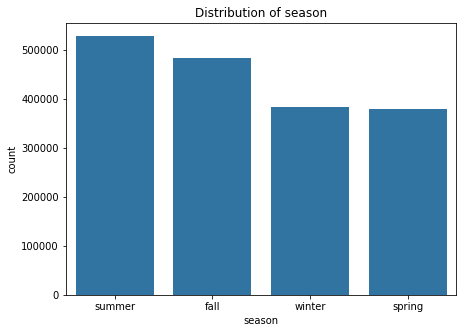

In [37]:
plt.figure(figsize=[7,5])
base_color=sb.color_palette()[0]
season_order=ford_df_clean['season'].value_counts().index
sb.countplot(data=ford_df_clean,x='season',color=base_color,order=season_order);
plt.title("Distribution of season");


**The Frequency distribution of seasons shows that, maximum number of bike trips happens in Summer season and moderately lower number in fall and the lowest in winter and spring seasons.**

### Following are the key takeaways:

### Which day of the week records for the maximum bike rides

In [38]:
ford_df_clean.start_time_weekday.value_counts()

Wed    307579
Thu    307494
Tue    305808
Mon    283594
Fri    275203
Sat    156064
Sun    135262
Name: start_time_weekday, dtype: int64

The maximum number of bike trips is recorded on Wednesdays,however, there is  marginal difference with thursdays and tuesdays.
Alos, weekends records the lowest number of bike trips. Probably due to non-working days.

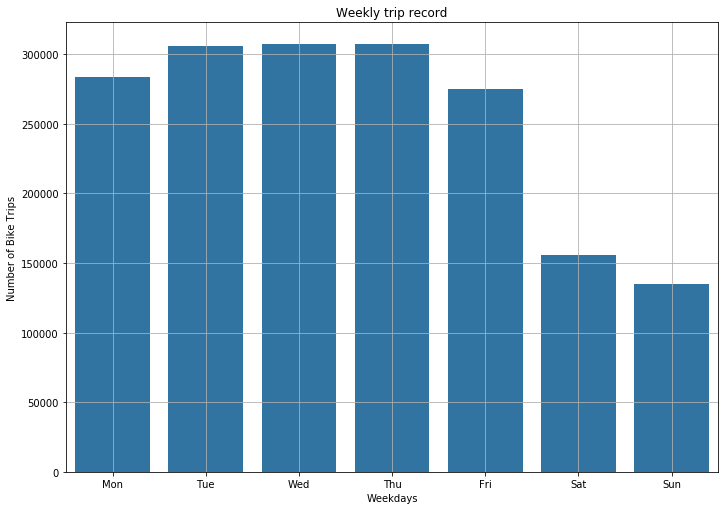

In [39]:
plt.figure(figsize=[ 11.69, 8.27])
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=ford_df_clean,x='start_time_weekday',color=base_color,order=weekday);
plt.xlabel("Weekdays")
plt.ylabel("Number of Bike Trips")
plt.title('Weekly trip record');
plt.grid(True)

**The maximum number of bike trips is recorded on Wednesdays,however, there is  marginal difference with thursdays and tuesdays.
Alos, weekends records the lowest number of bike trips. Probably due to non-working days.**

### During what time of the day bike rides are recorded most

The maximum percentage of trips occurs during peak(working) hours of 8am and also at around 5pm Could be because that's when people get to and back from the work.Its a bimodal distribution

In [40]:
ford_df_clean.start_time_hour.value_counts()

17    212929
8     203633
18    165809
9     155711
16    135364
19    100095
7      99754
15     88301
12     81667
13     78833
10     77654
14     74636
11     71817
20     64411
21     45520
6      34938
22     29772
23     17846
0       9748
5       9371
1       5652
2       3472
4       2054
3       2017
Name: start_time_hour, dtype: int64

In [41]:
#get proportion
n_points=ford_df_clean.shape[0]
max_count=ford_df_clean['start_time_hour'].value_counts().max()
max_prop=max_count/n_points

In [42]:
#generate tick mark locations and names

tick_props=np.arange(0,max_prop,0.01)
tick_names=['{:0.2f}'.format(v) for v in tick_props]

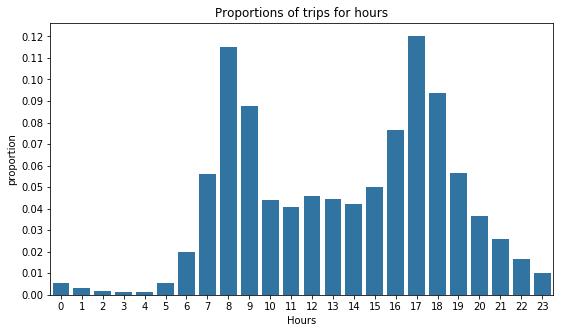

In [43]:
# hourly usage of the bike sharing systems
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data=ford_df_clean,x='start_time_hour',color=base_color)
plt.yticks(tick_props*n_points,tick_names)
plt.ylabel('proportion')
plt.xlabel('Hours');
plt.title("Proportions of trips for hours");

**Graph is a bimodal distribution with the maximum percentage of trips occuring during peak(working) hours of 8am and also at around 5pm Could be because that's when people get to and back from the work.**


#### Frequency distribution of Duration(min)

In [44]:
ford_df_clean.duration_min.describe()

count    1.771004e+06
mean     1.278873e+01
std      3.175064e+01
min      1.016667e+00
25%      5.716667e+00
50%      9.000000e+00
75%      1.391667e+01
max      1.438017e+03
Name: duration_min, dtype: float64

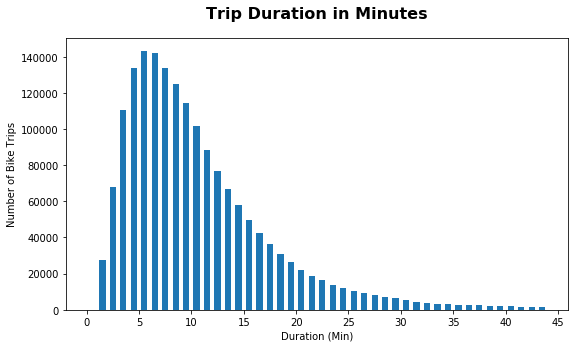

In [45]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=[9,5])
plt.hist(data = ford_df_clean, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
plt.title("Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

**It shows a Right skewed distribution, on an average,trips were of short duration of 5 to 10 mins with 75% of trips being under 14 minutes.This suggests the majority of bikers avail for short duration trips.**

### What percentage of users are Male,Female and Others


The Donut Plot below demonstrates the majority of users of the bike share system are male, representing 73.3% of the total users, female by 25.2% and other by 1.6%.

In [46]:
# Usage by females, males, and other
gender = ford_df_clean.member_gender.value_counts()/n_points
gender

Male      0.732255
Female    0.251668
Other     0.016077
Name: member_gender, dtype: float64

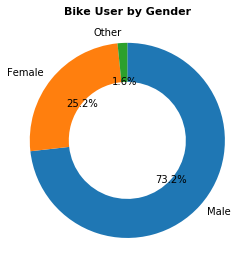

<Figure size 841.68x595.44 with 0 Axes>

In [49]:
plt.pie(gender,labels=gender.index, autopct='%1.1f%%',startangle=90,counterclock=False,wedgeprops={'width':0.4});
plt.axis('square');
plt.title('Bike User by Gender', y=1.05, fontsize=11, fontweight='bold');
plt.figure(figsize=[ 11.69, 8.27]);

**The Donut Plot above demonstrates the majority of users of the bike share system are male, representing 73.3% of the total users, female by 25.2% and other by 1.6%.**

### #bike trips based on age groups

In [50]:
ford_df_clean.age.max(),ford_df_clean.age.mean()

(59.0, 34.82841427800276)

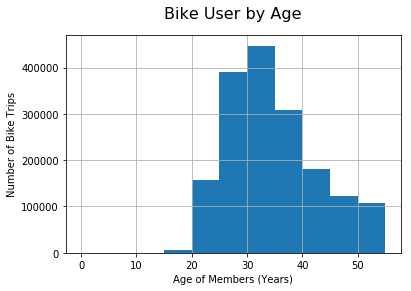

In [51]:
# Age group data
bin_edges = np.arange(0, 60, 5)

plt.hist(data = ford_df_clean, x = 'age', bins = bin_edges);

plt.title("Bike User by Age", y=1.05, fontsize=16)
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');
plt.grid(True)

**Considering age group upto 60 years,
The histogram shows the majority of bike users fall between the ages of 25 - 40 years, which is also the same age range of the working adults. **

### Illustrate the proportions of Users based on Subscription type

The Majority of the Bike Users are subscribers. Users with a monthly membership ("Subscriber type") make 88% of all customers in FY 2018 that used the system. 12% were casual riders ("Customer type") using the bike share system ocasionally.



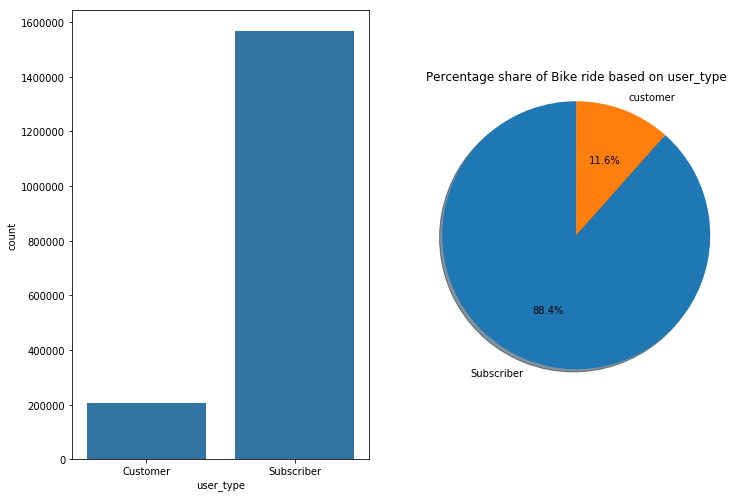

In [52]:
plt.figure(figsize=[ 11.69, 8.27])
plt.subplot(1,2,1)
sb.countplot(data = ford_df_clean, x = 'user_type', color = base_color);

plt.subplot(1,2,2);

labels = ['Subscriber', 'customer']
plt.pie(ford_df_clean.user_type.value_counts(), autopct='%1.1f%%',labels=labels, shadow=True, startangle=90);

plt.axis('square');
plt.title("Percentage share of Bike ride based on user_type");

**Majority of the Bike Users are subscribers. Users with a monthly membership ("Subscriber type") make 88% of all customers in FY 2018 that used the system. 12% were casual riders ("Customer type") using the bike share system ocasionally.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There was one unusal points for the duration (sec), which in some cases lasted more than 24h. For the histogram I set the max range to 3600 sec = 60 min.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was one unusal distribution for the member birth year, which in some cases was dated before 1900. Since 95% of the members are between 17 and 57 years, I removed users older than 60.

### Bivariate Exploration

Main focus here is on exploring User_type and its relationship with other features.

### Depict the proportions of User type based on Gender

The majority of Subscribers are Male with thrice the number of Female Subscribers.The same trend is seen in the customer riders as well.Suggesting irrespective of User_type, Male bikers are more than Female bikers and others.



In [53]:
ct_counts=ford_df_clean.groupby(['member_gender','user_type']).size().reset_index(name='count')

In [54]:
#rearrange the data
visu=ct_counts.pivot(index='member_gender',columns='user_type',values='count')
visu

user_type,Customer,Subscriber
member_gender,,
Female,63798,381907
Male,136731,1160095
Other,4205,24268


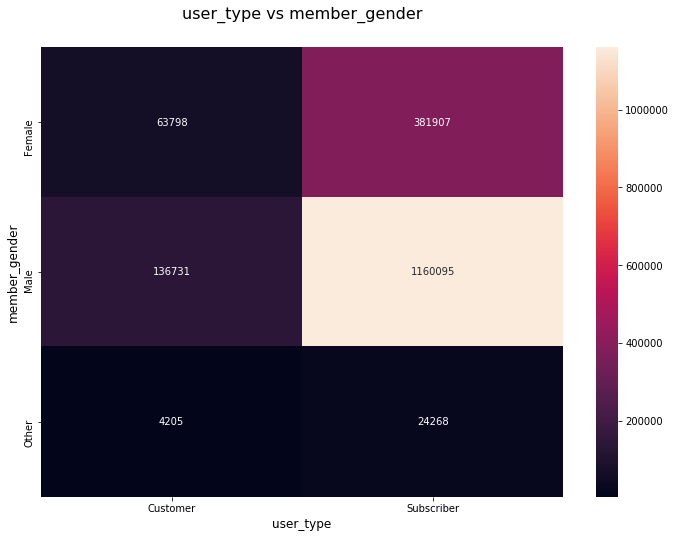

In [56]:
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(visu,annot=True,fmt='d');
plt.title('user_type vs member_gender',fontsize=16,y=1.05);
plt.xlabel('user_type',fontsize=12)
plt.ylabel('member_gender',fontsize=12);


**The majority of Subscribers are Male with thrice the number of Female Subscribers.The same trend is seen in the customer riders as well.Suggesting irrespective of User_type, Male bikers are more than Female bikers and others.**

#### User_type vs Season

In [57]:
#convert season column to category
season=['winter','spring','summer','fall']
seasclasses=pd.api.types.CategoricalDtype(ordered=True,categories=season)
ford_df_clean['season']=ford_df_clean['season'].astype(seasclasses)

In [58]:
ford_df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
start_time_month_name              object
start_time_month                    int32
start_time_weekday                 object
start_time_hour                     int64
age                               float64
season                           category
duration_min                      float64
dtype: object

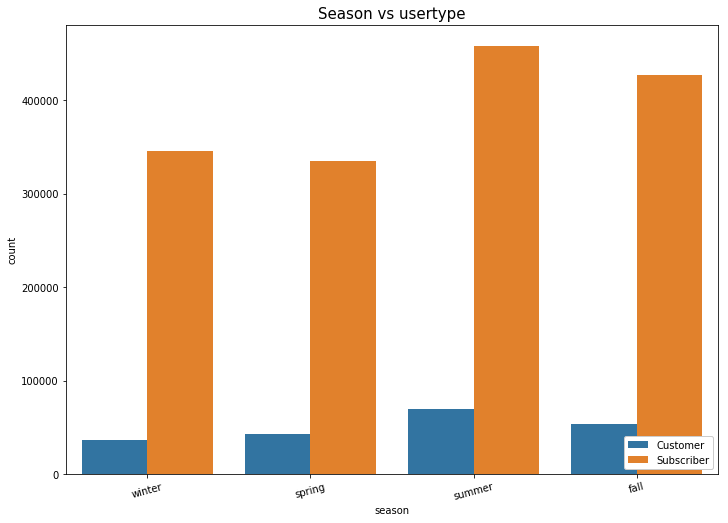

In [60]:
#Plotting
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=ford_df_clean,x='season',hue='user_type')
ax.legend(loc=4,framealpha=1)
plt.xticks(rotation=15)
plt.title("Season vs usertype",fontsize=15);

**As expected, the graph showsthat the  Summer season sees the maximum bike Subscribers when compared to other seasons.Number of Occasional bikers(customers) are more or less the same across all seasons and the Customer number being relatively negligible when compared to Subscribers.**

### Represent the length of Duration per User type

There is a difference in the trip duration between customers and subscribers. Customers typically have trip durations are longer than for subscribers.This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

In [61]:
# scatter plot of duration_min vs. member_age, with log transform on duration_min axis
samples = np.random.choice(ford_df_clean.shape[0], 5000, replace = False)
samp = ford_df_clean.loc[samples,:]


C:\Users\deeps\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


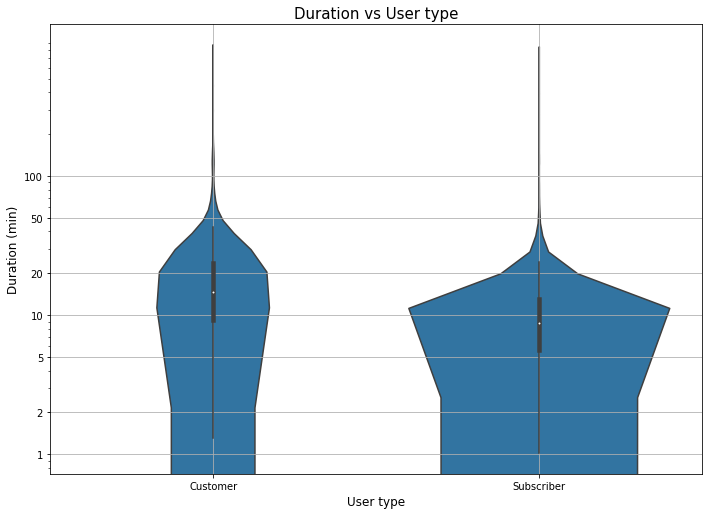

In [63]:
plt.figure(figsize=[ 11.69, 8.27])
sb.violinplot(data = samp, x = 'user_type', y = 'duration_min',color=base_color);
plt.xlabel('User type',fontsize=12);
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.ylabel('Duration (min)',fontsize=12);
plt.title("Duration vs User type",fontsize=15);
plt.grid(True)

**There is a difference in the trip duration between customers and subscribers.
Customers typically have trip durations are longer than for subscribers.This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.**

####  What are the Weekdays Trends by User Type

There is a sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends, indicates majority of customers are non-working crowd .On the contrary,Subscribers have steadily high usage on weekdays, with a sharp decline on the weekends.

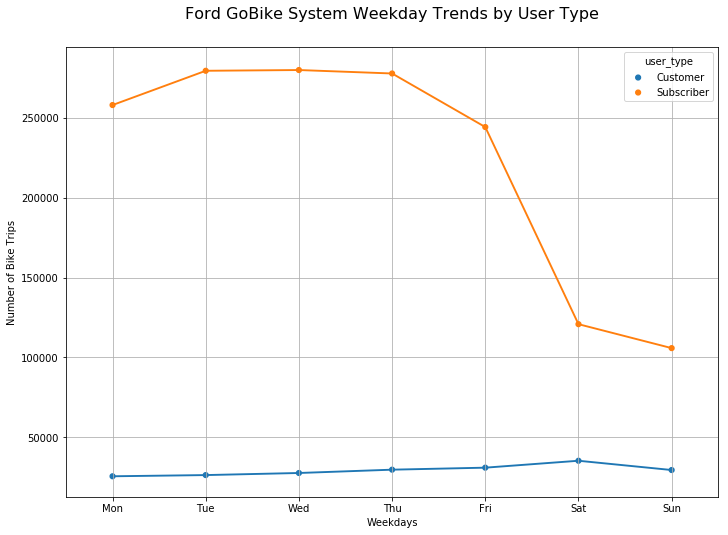

In [64]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=[ 11.69, 8.27])
ford_df_clean_user_week = ford_df_clean.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=ford_df_clean_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Weekday Trends by User Type', y=1.05, fontsize=16)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

In [65]:
ford_df_clean_user_week.max()

start_time_weekday           Wed
user_type             Subscriber
0                         279985
dtype: object

**There is a sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends, indicates majority of customers are non-working crowd .On the contrary,Subscribers have steadily high usage on weekdays, with a sharp decline on the weekends.**

#### Start_time_hour vs user_type

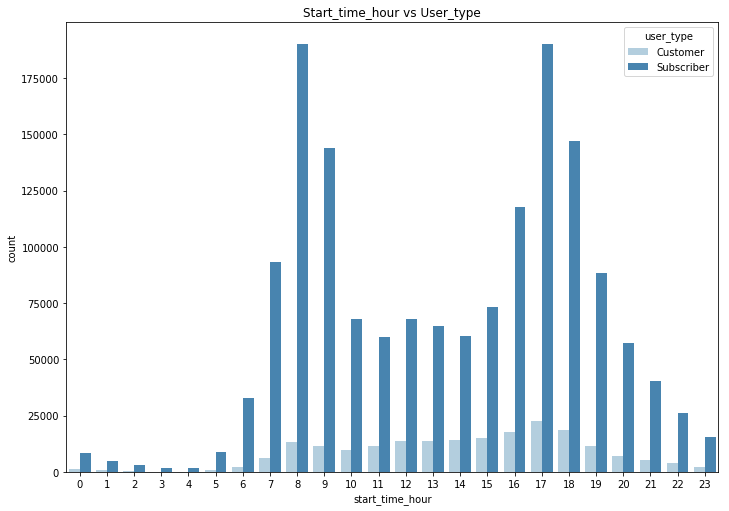

In [66]:
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = ford_df_clean, x = 'start_time_hour', hue = 'user_type', palette = 'Blues');
ax.legend(loc = 1, ncol = 2);
plt.title("Start_time_hour vs User_type");

**Bimodal distribution depicts that,8.00AM and 5:00 PM have the most Subscribers compared to other hours.
User_type doesn't impact much on start_time_hour as the above distribution is same as univariate distribution of 'start_time_hour'.**

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The data suggests that customers are casual riders such as tourists, or students on a school vacation or holiday. This is accurate when factoring in that Customer usage increases on the weekends,making longer trips. In contrast, the data suggests Subscribers are daily commuters or full time students who use the system during weekdays, better weather, and mostly for shorter distances. They mainly rent bikes before and after a typical work or school day (8-9am and 5-6pm).

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?¶
There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, which may be for longer trips around the surrounding area. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.


## Multivariate Exploration


I created plots of three or more variables to investigate the Ford Go Bike data even further.



In [67]:
ford_df_clean.age.describe()

count    1.771004e+06
mean     3.482841e+01
std      8.947861e+00
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      5.900000e+01
Name: age, dtype: float64

In [68]:
#create a new column for age groups.
age_labels=['15-25','26-35','36-45','46-55','56-66']
bin_edges=[15,25,35,45,55,65]
ford_df_clean['age_group']=pd.cut(ford_df_clean.age,bin_edges,labels=age_labels)


###  Relationship between Duration_min, User_type for different age_groups and member_gender

The trend shows,females take longer trips (measured in time) than males and other. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small). Also, the older age people (mostly retired) make long trips and short trips by young adults



C:\Users\deeps\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


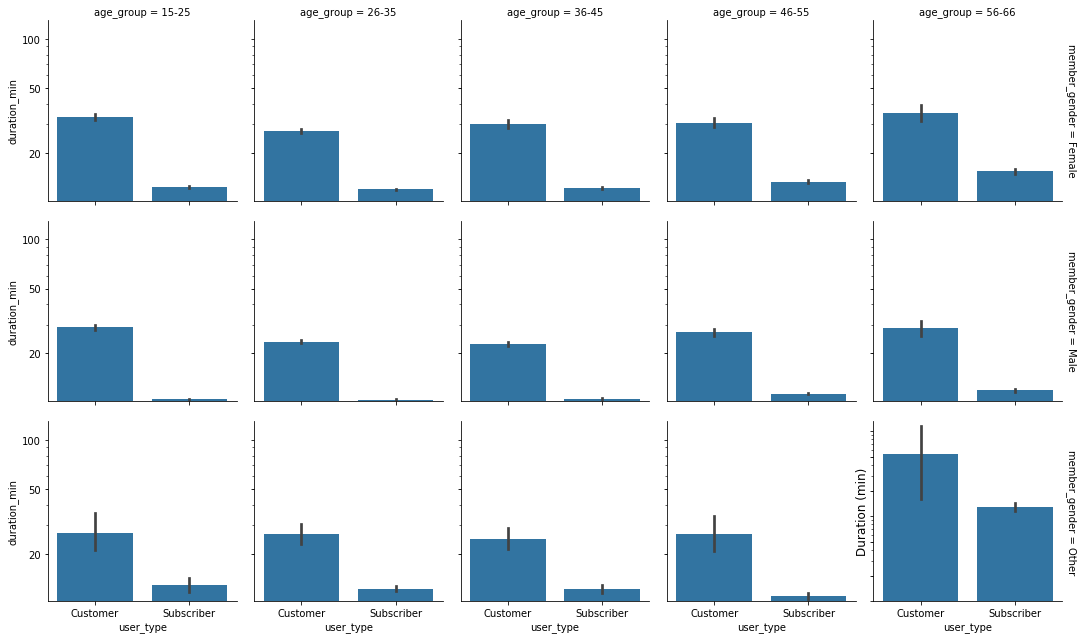

In [69]:
g=sb.FacetGrid(data=ford_df_clean,col='age_group',row='member_gender',margin_titles=True);
g.map(sb.barplot,'user_type','duration_min');
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.ylabel('Duration (min)',fontsize=12);
#plt.title("Duration vs User type",fontsize=15);


**The trend shows,females take longer trips (measured in time) than males and other. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small).
Also, the older age people (mostly retired) make long trips and short trips by young adults**



### Explore Daily and weekly usage by User types

**Customers use the bike sharing system more often on weekends:**

weekdays: most bike rides happen around 8-9am and 5-6pm with the peak on Fridays around 5pm

weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm

**Subscribers use the bike sharing system mainly on weekdays:**

weekdays: most bike rides happen around 8-9am and 5-6pm with the peak on Tuesdays around 8am

weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

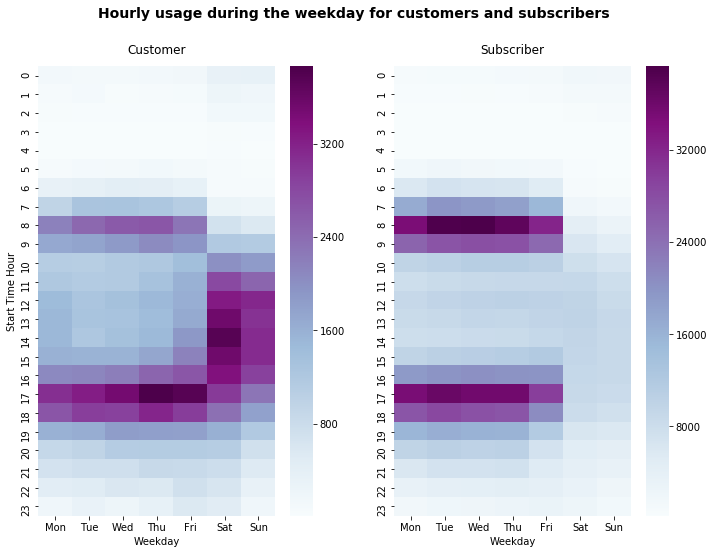

In [70]:
# Setting the weekday order
ford_df_clean['start_time_weekday'] = pd.Categorical(ford_df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=[ 11.69, 8.27])
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = ford_df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer,cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = ford_df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber,cmap="BuPu")
plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');


**Customers use the bike sharing system more often on weekends:**

weekdays: most bike rides happen around 8-9am and 5-6pm with the peak on Fridays around 5pm

weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm

**Subscribers use the bike sharing system mainly on weekdays:**

weekdays: most bike rides happen around 8-9am and 5-6pm with the peak on Tuesdays around 8am

weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

### Hourly usage of the bike share system per user type and gender

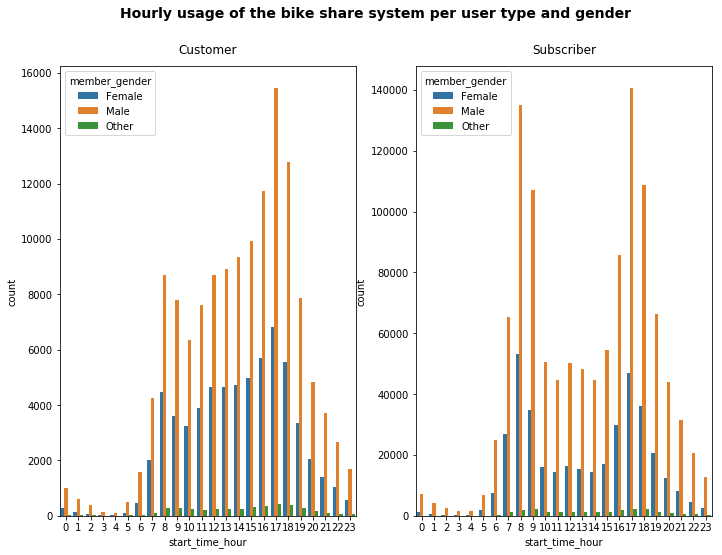

In [71]:
plt.figure(figsize=[ 11.69, 8.27])
plt.suptitle('Hourly usage of the bike share system per user type and gender', fontsize=14, fontweight='semibold')


# clustered barplots for customers
plt.subplot(1, 2, 1)
df_customer=ford_df_clean.query('user_type=="Customer"')
sb.countplot(data=df_customer,x='start_time_hour',hue='member_gender')
plt.title("Customer", y=1.015);


plt.subplot(1,2,2)
df_subscriber=ford_df_clean.query('user_type=="Subscriber"')
sb.countplot(data=df_subscriber,x='start_time_hour',hue='member_gender')
plt.title("Subscriber", y=1.015);


**During the day, both males and females use the system the same way: customers use bikes mainly between 8 am - 7 pm; subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.**

### weekly usage by customers and subscribers for different Genders

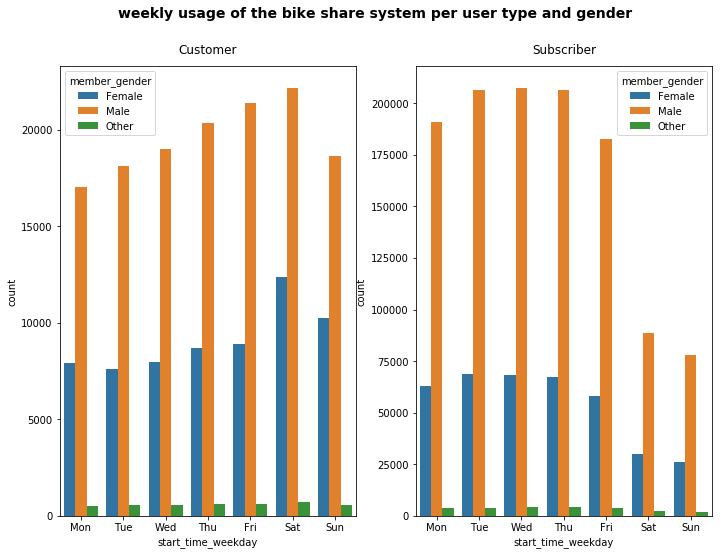

In [72]:
plt.figure(figsize=[ 11.69, 8.27])
plt.suptitle('weekly usage of the bike share system per user type and gender', fontsize=14, fontweight='semibold')


# clustered barplots for customers
plt.subplot(1, 2, 1)
df_customer=ford_df_clean.query('user_type=="Customer"')
sb.countplot(data=df_customer,x='start_time_weekday',hue='member_gender')
plt.title("Customer", y=1.015);


plt.subplot(1,2,2)
df_subscriber=ford_df_clean.query('user_type=="Subscriber"')
sb.countplot(data=df_subscriber,x='start_time_weekday',hue='member_gender')
plt.title("Subscriber", y=1.015);


**As in the previous section, the trend is very similar for males and females: customers use the system more often during weekends than within a week (although the jump in bike used on weekends is much higher for females than for males); subscribers use the system mainly within a week.**

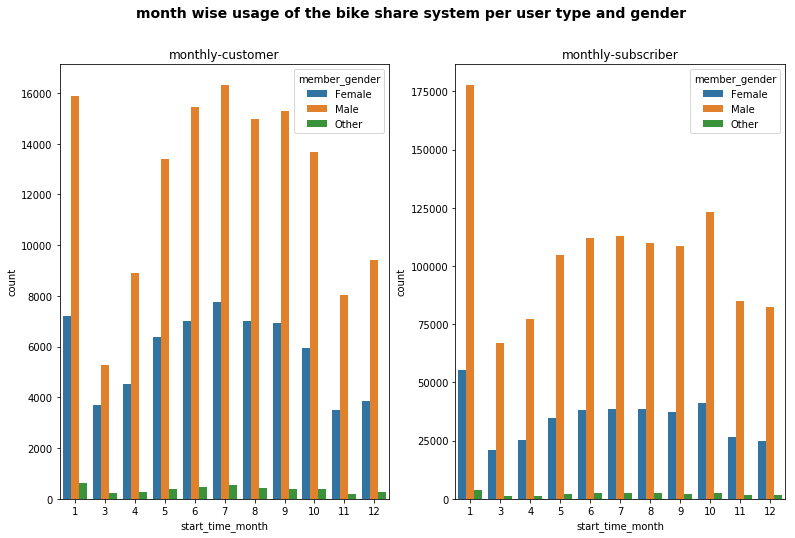

In [142]:
plt.figure(figsize=(13,8))
plt.suptitle('month wise usage of the bike share system per user type and gender', fontsize=14, fontweight='semibold')


# clustered barplots for customers

plt.subplot(1,2,1)
sb.countplot(data=df_customer,x='start_time_month',hue='member_gender')
plt.title("monthly-customer");

plt.subplot(1,2,2)
sb.countplot(data=df_subscriber,x='start_time_month',hue='member_gender')
plt.title("monthly-subscriber");


**Reproducing same plot but with start_time_month.
The trend is very similar for males and females: **

**for customers, the highest demand is around summertime, reaching its peak in July; as well as January**

**for subscribers, the highest demand is in January,followed by May till October, reaching it's peak in October. Suprisingly,The trend also suggests that, female customers make use of the system more than female subscribers.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1.Subscriber vs Customer age was expanded upon through the use of age groups.
visuals based on age group showed ,young adults(25-40yrs) made short trips than elderly people(55-66yrs),who utilised bikes solely for long trips regardless of gender.

2.Plotting a heatmap of when bikes are high in demand throughout the day on each weekday  shed light on the customers behaviour.

3.Plotting #bike trips throughout the day and #bike trips within the weekdays separately gave the impression that the demand for bikes is quite high throughout the day with a peak around 5pm. The trend within weekdays for customers follows (although customers are rather not early birds) the one for subscribers who rent bikes mainly around commute hours (8-9am and 5-6pm). For customers, as depicted in univariate explorations, most of the trips happen on weekends but mainly between 10am - 8pm with the peak on Saturdays around 2pm, which was not previously visible.

### Were there any interesting or surprising interactions between features?
With regard to difference in trends between gender,there are quite a lot of females using the system between January and March in comparison to males - the ratio (male:female) is much smaller than for the rest of the year. Moreover females take longer trips (measured in time) than males and others.

### Summary


Renting bikes are done by two types of clients :**subscribers** who are mainly daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around the lunch time, and
**customers**, usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.
With regard to Gender and age group ,Long trips are made by Females and older aged people.